<a href="https://colab.research.google.com/github/Aswini-J/Exp3-Sobel-edge-detection-filter-using-CUDA-to-enhance-the-performance-of-image-processing-tasks./blob/main/Sobel_edge_detection_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc4jupyter

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-b6w3a4a7
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-b6w3a4a7
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 801584cceb559adc54e828ebe9b385c5f53fe70f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


In [ ]:
from pathlib import Path

file_path = Path('/absolute/path/to/images.jpeg')
if file_path.exists():
    print("File exists!")
else:
    print("File does not exist!")


File does not exist!


In [ ]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.jpeg to images.jpeg


In [ ]:
from pathlib import Path

# Assuming the file is in the same directory as the notebook
file_path = Path('images.jpeg')
if file_path.exists():
    print("File exists!")
else:
    print("File does not exist!")


File exists!


In [ ]:
pwd


'/content'

In [ ]:
ls /content/images.jpeg

/content/images.jpeg


In [ ]:
#ls -l /content/images.jpeg
import cv2
image = cv2.imread('/content/images.jpeg')
if image is None:
    print("Error: Image not found or unable to read the image.")
else:
    print("Image read successfully.")


Image read successfully.


In [ ]:
%%writefile sobelEdgeDetectionFilter.cu
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <cuda_runtime.h>
#include <opencv2/opencv.hpp>

using namespace cv;

__global__ void sobelFilter(unsigned char *srcImage, unsigned char *dstImage, unsigned int width, unsigned int height) {




//Write your code here





}

void checkCudaErrors(cudaError_t r) {
    if (r != cudaSuccess) {
        fprintf(stderr, "CUDA Error: %s\n", cudaGetErrorString(r));
        exit(EXIT_FAILURE);
    }
}

int main() {
    // Read input image
    Mat image = imread("/content/images.jpeg", IMREAD_COLOR);

    if (image.empty()) {
        printf("Error: Image not found.\n");
        return -1;
    }

    int width = image.cols;
    int height = image.rows;
    size_t imageSize = width * height * sizeof(unsigned char);

    // Allocate host memory for output image
    unsigned char *h_outputImage = (unsigned char *)malloc(imageSize);
    if (h_outputImage == nullptr) {
        fprintf(stderr, "Failed to allocate host memory\n");
        return -1;
    }

    // Allocate device memory
    unsigned char *d_inputImage, *d_outputImage;
    checkCudaErrors(cudaMalloc(&d_inputImage, imageSize));
    checkCudaErrors(cudaMalloc(&d_outputImage, imageSize));
    checkCudaErrors(cudaMemcpy(d_inputImage, image.data, imageSize, cudaMemcpyHostToDevice));

    // Define CUDA events for timing
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    // Launch kernel
    dim3 blockSize(16, 16);
    dim3 gridSize(ceil(width / 16.0), ceil(height / 16.0));

    cudaEventRecord(start);
    sobelFilter<<<gridSize, blockSize>>>(d_inputImage, d_outputImage, width, height);
    cudaEventRecord(stop);

    // Synchronize events
    cudaEventSynchronize(stop);

    // Calculate elapsed time
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);

    // Copy result back to host
    checkCudaErrors(cudaMemcpy(h_outputImage, d_outputImage, imageSize, cudaMemcpyDeviceToHost));

    // Write output image
    Mat outputImage(height, width, CV_8UC1, h_outputImage);
    imwrite("output_sobel.jpeg", outputImage);

    // Free memory
    free(h_outputImage);
    cudaFree(d_inputImage);
    cudaFree(d_outputImage);

    // Destroy CUDA events
    cudaEventDestroy(start);
    cudaEventDestroy(stop);

    // Print elapsed time
    printf("Total time taken: %f milliseconds\n", milliseconds);

    return 0;
}


Writing sobelEdgeDetectionFilter.cu


In [ ]:
!nvcc -o sobelEdgeDetectionFilter sobelEdgeDetectionFilter.cu `pkg-config --cflags --libs opencv4`


/usr/include/opencv4/opencv2/stitching/detail/warpers.hpp(235): warning #611-D: overloaded virtual function "cv::detail::PlaneWarper::buildMaps" is only partially overridden in class "cv::detail::AffineWarper"
  class AffineWarper : public PlaneWarper
        ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

/usr/include/opencv4/opencv2/stitching/detail/warpers.hpp(235): warning #611-D: overloaded virtual function "cv::detail::PlaneWarper::warp" is only partially overridden in class "cv::detail::AffineWarper"
  class AffineWarper : public PlaneWarper
        ^

/usr/include/opencv4/opencv2/stitching/detail/blenders.hpp(100): warning #611-D: overloaded virtual function "cv::detail::Blender::prepare" is only partially overridden in class "cv::detail::FeatherBlender"
  class FeatherBlender : public Blender
        ^

/usr/include/opencv4/opencv2/stitching/detail/blenders.hpp(127): warning #611-D: overloaded virtual function "cv::detail::Blender::prepare" is

In [ ]:
!./sobelEdgeDetectionFilter

Total time taken: 118.108162 milliseconds


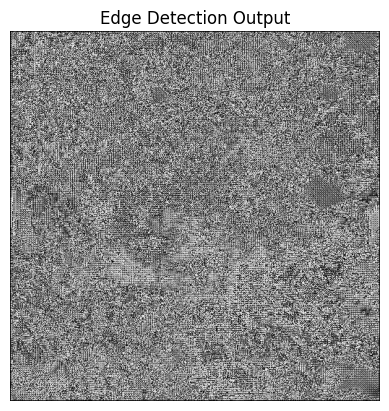

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read and display the output image
output_image_path = '/content/output_sobel.jpeg'
output_image = cv2.imread(output_image_path, cv2.IMREAD_GRAYSCALE)  # Use IMREAD_GRAYSCALE if it's a single-channel image

# Display the image
plt.imshow(output_image, cmap='gray')
plt.title('Edge Detection Output')
plt.axis('off')  # Hide the axes
plt.show()
